In [56]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [27]:
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)

classes = dict(zip(range(0,3), wine.target_names))
df_target = pd.DataFrame(data=wine.target, columns=['classes'])
df_target['classes'] = df_target['classes'].apply(lambda num: classes[num])

df_total = pd.concat([df_wine, df_target], axis=1)
df_total.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  classes  
0                          3.92   1065.0  class_0  
1                          3.40   1050.0  class_0  
2                          3.17   1185.0  class_0  
3                          3.45   1480.0  class_0  
4                          2.93    735.0  class_0

In [31]:
df_wine.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000

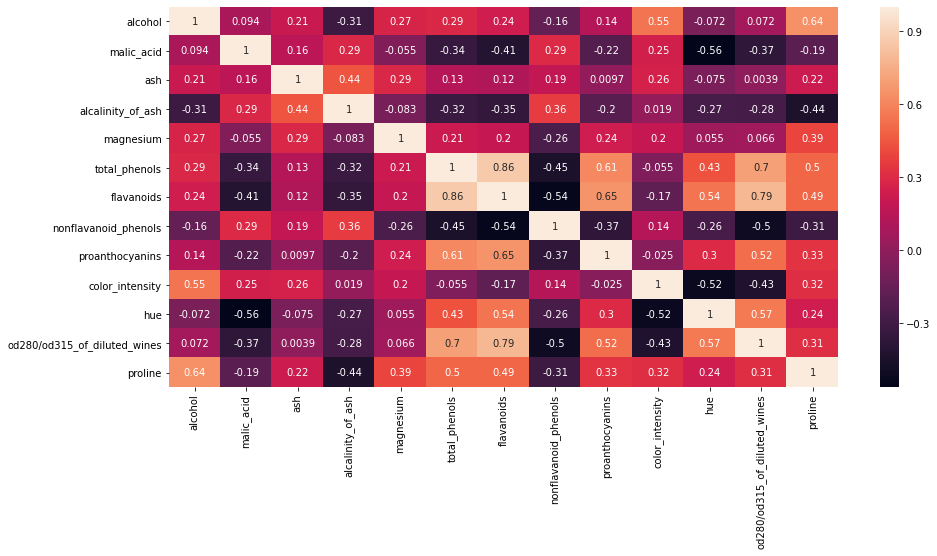

In [37]:
plt.figure(figsize=(15,7))
sns.heatmap(df_wine.corr(), annot=True)
plt.show()

Flavanoids está correlacionado con total_phenols y con od280. ¿Podría ser que esta correlación nos permita identificar las clases de vinos?

# Benchmarking

Como este es un problema de clasificación multi-clase, no conviene usar regresión logística. Haré un benchmark con KNN

In [46]:
X = wine.data
y = wine.target

In [48]:
# Empiezo estandarizando los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=53)

In [52]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [54]:
preds = knn.predict(X_test)
print(accuracy_score(y_test, preds))

0.9444444444444444


In [61]:
kf = KFold(n_splits=5, shuffle=True, random_state=12)
scores = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(knn, X_train, y_train, cv=kf)
    scores.append({
        'neighbors': i,
        'mean': np.mean(cv_scores),
        'std': np.std(cv_scores)
    })
df_scores = pd.DataFrame(scores)

In [64]:
df_scores.sort_values(by='mean', ascending=False).head()

neighbors   mean    std
18         19  0.984  0.032
17         18  0.984  0.032
6           7  0.984  0.032
7           8  0.984  0.032
10         11  0.984  0.032

Lo que no me termina de queda claro es cómo se calcula ```cross_val_scores```. Me da la sensación de que considerar 18 vecinos debería overfitear el modelo a los datos de train. Pero supongo que en realidad en cross val debería considerar el score de train y test dentro de cv?

In [72]:
best_k = 6

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
yt_pred = knn.predict(X_test)

print(accuracy_score(y_test, yt_pred))

0.9814814814814815
